# %% [markdown]
# # **Sistem Rekomendasi Pupuk Berdasarkan Parameter Tanah dan Tanaman**
# ## Perbandingan Multiple Machine Learning Algorithms

# %% [markdown]
# ## 1. Import Libraries dan Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Import dari scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import model dari scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

print("Semua library berhasil diimport!")

Semua library berhasil diimport!


2. Load dan Eksplorasi Data

In [3]:
# Load data
df = pd.read_csv('train.csv')

# Tampilkan informasi dasar
print("=" * 60)
print("INFORMASI DATASET")
print("=" * 60)
print(f"Shape dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

print("\n5 baris pertama:")
display(df.head())

print("\nInformasi tipe data:")
print(df.info())

print("\nStatistik deskriptif:")
display(df.describe())

INFORMASI DATASET
Shape dataset: (750000, 10)
Jumlah baris: 750000
Jumlah kolom: 10

5 baris pertama:


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP



Informasi tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB
None

Statistik deskriptif:


,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


Cek missing values


In [4]:
print("Missing values per kolom:")
print(df.isnull().sum())

# Cek nilai unik
print("\nNilai unik di setiap kolom kategorikal:")
categorical_cols = ['Soil Type', 'Crop Type', 'Fertilizer Name']
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Jumlah kelas: {df[col].nunique()}")
    print(f"  Kelas: {df[col].unique()[:10]}")  # Tampilkan 10 pertama

Missing values per kolom:
id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

Nilai unik di setiap kolom kategorikal:

Soil Type:
  Jumlah kelas: 5
  Kelas: ['Clayey' 'Sandy' 'Red' 'Loamy' 'Black']

Crop Type:
  Jumlah kelas: 11
  Kelas: ['Sugarcane' 'Millets' 'Barley' 'Paddy' 'Pulses' 'Tobacco' 'Ground Nuts'
 'Maize' 'Cotton' 'Wheat']

Fertilizer Name:
  Jumlah kelas: 7
  Kelas: ['28-28' '17-17-17' '10-26-26' 'DAP' '20-20' '14-35-14' 'Urea']


In [5]:
# Analisis target variable
print("\n" + "=" * 60)
print("ANALISIS TARGET VARIABLE (Fertilizer Name)")
print("=" * 60)

print(f"Jumlah kelas pupuk: {df['Fertilizer Name'].nunique()}")
print("\nDistribusi kelas:")
fertilizer_counts = df['Fertilizer Name'].value_counts()
print(fertilizer_counts)


ANALISIS TARGET VARIABLE (Fertilizer Name)
Jumlah kelas pupuk: 7

Distribusi kelas:
Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64


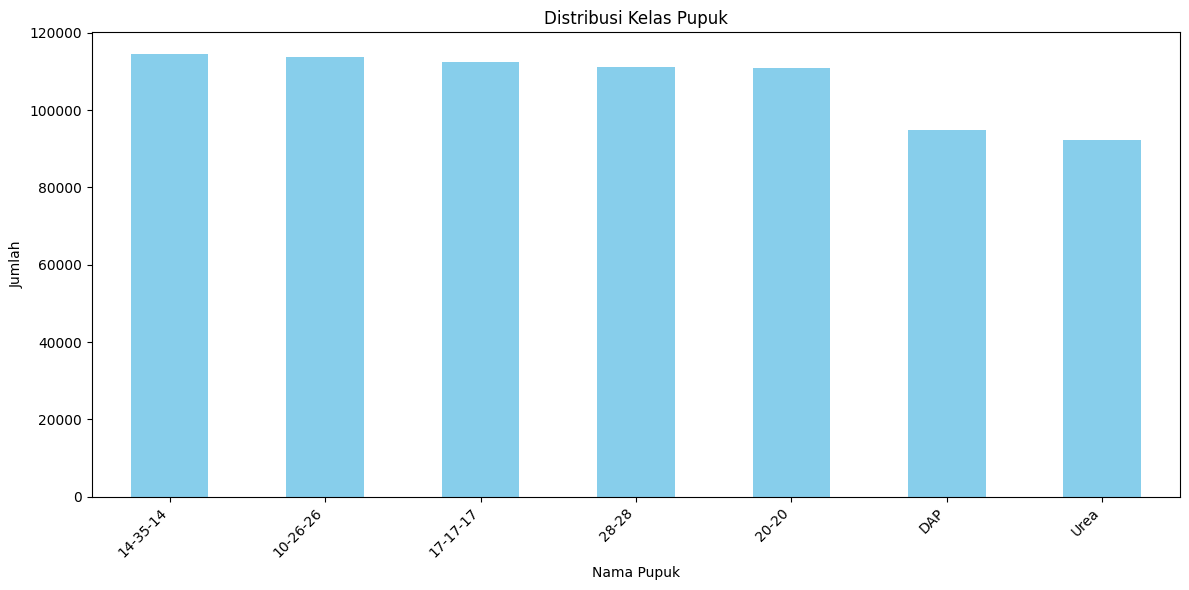

In [6]:
plt.figure(figsize=(12, 6))
fertilizer_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Kelas Pupuk')
plt.xlabel('Nama Pupuk')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Preprocessing Data

In [7]:
# %%
print("\n" + "=" * 60)
print("PREPROCESSING DATA")
print("=" * 60)

# Buat copy data untuk preprocessing
df_processed = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Soil Type', 'Crop Type', 'Fertilizer Name']

print("\nLabel Encoding untuk kolom kategorikal:")
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

    print(f"\n{col}:")
    print(f"  Classes: {le.classes_}")
    print(f"  Encoded values: {le.transform(le.classes_)}")

# Pisahkan features dan target
X = df_processed.drop(['id', 'Fertilizer Name'], axis=1)
y = df_processed['Fertilizer Name']

print(f"\nShape X (features): {X.shape}")
print(f"Shape y (target): {y.shape}")


PREPROCESSING DATA

Label Encoding untuk kolom kategorikal:

Soil Type:
  Classes: ['Black' 'Clayey' 'Loamy' 'Red' 'Sandy']
  Encoded values: [0 1 2 3 4]

Crop Type:
  Classes: ['Barley' 'Cotton' 'Ground Nuts' 'Maize' 'Millets' 'Oil seeds' 'Paddy'
 'Pulses' 'Sugarcane' 'Tobacco' 'Wheat']
  Encoded values: [ 0  1  2  3  4  5  6  7  8  9 10]

Fertilizer Name:
  Classes: ['10-26-26' '14-35-14' '17-17-17' '20-20' '28-28' 'DAP' 'Urea']
  Encoded values: [0 1 2 3 4 5 6]

Shape X (features): (750000, 8)
Shape y (target): (750000,)


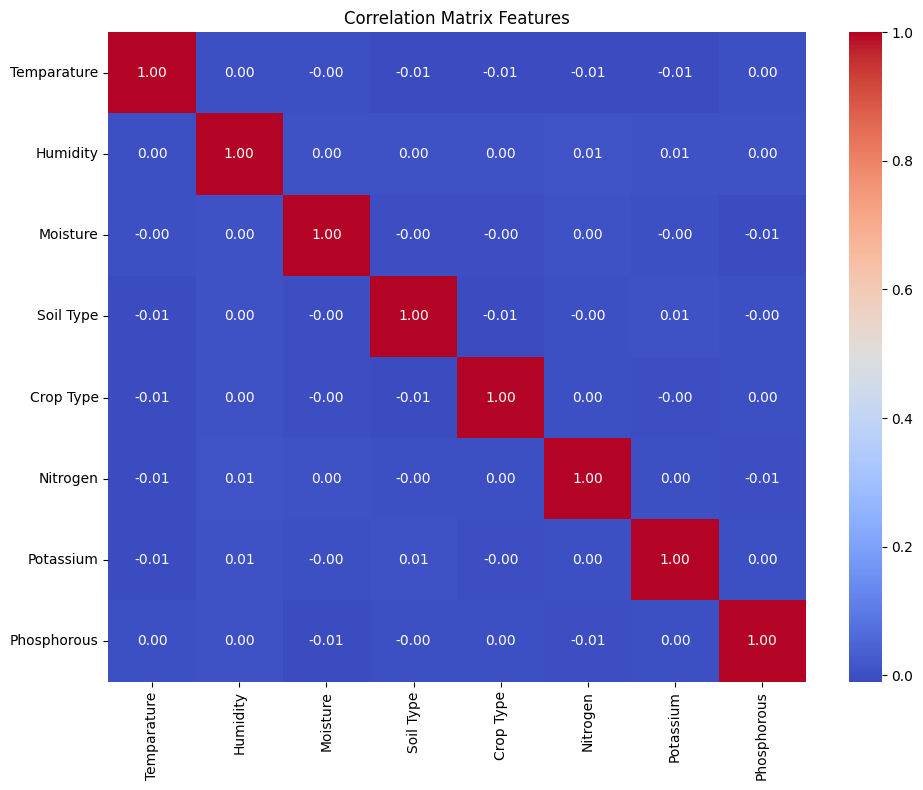

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Features')
plt.tight_layout()
plt.show()

Split Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Check class distribution in train and test
print("\nDistribusi kelas di training set:")
print(pd.Series(y_train).value_counts())
print("\nDistribusi kelas di test set:")
print(pd.Series(y_test).value_counts())

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling selesai!")

Training set size: (600000, 8)
Test set size: (150000, 8)

Distribusi kelas di training set:
Fertilizer Name
1    91549
0    91110
2    89962
4    88926
3    88711
5    75888
6    73854
Name: count, dtype: int64

Distribusi kelas di test set:
Fertilizer Name
1    22887
0    22777
2    22491
4    22232
3    22178
5    18972
6    18463
Name: count, dtype: int64

Feature scaling selesai!


4. Inisiasi Model Perbandingan

In [11]:
print("\n" + "=" * 60)
print("INISIALISASI MODEL MACHINE LEARNING")
print("=" * 60)

# Dictionary untuk menyimpan semua model
models = {
    # Traditional Models
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    
    # Ensemble Models
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=100, random_state=42),
    
    # Neural Network
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

print(f"Total model yang akan dibandingkan: {len(models)}")
print("\nDaftar model:")
for i, (name, model) in enumerate(models.items(), 1):
    print(f"{i}. {name}: {type(model).__name__}")


INISIALISASI MODEL MACHINE LEARNING
Total model yang akan dibandingkan: 10

Daftar model:
1. Logistic Regression: LogisticRegression
2. Decision Tree: DecisionTreeClassifier
3. K-Nearest Neighbors: KNeighborsClassifier
4. Support Vector Machine: SVC
5. Naive Bayes: GaussianNB
6. Random Forest: RandomForestClassifier
7. Gradient Boosting: GradientBoostingClassifier
8. AdaBoost: AdaBoostClassifier
9. Bagging: BaggingClassifier
10. Neural Network: MLPClassifier


Training dan Evaluasi Model Individual


In [ ]:
print("\n" + "=" * 60)
print("TRAINING DAN EVALUASI MODEL INDIVIDUAL")
print("=" * 60)

results = {}
training_times = {}


import time

for name, model in models.items():
    print(f"\n[PROSES] Training {name}...")
    
    try:
        # Catat waktu mulai
        start_time = time.time()
        
        # Training
        model.fit(X_train_scaled, y_train)
        # Catat waktu selesai
        training_time = time.time() - start_time
        training_times[name] = training_time
        
        # Prediction
        y_pred = model.predict(X_test_scaled)
        
        # Evaluation
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        
        print(f"  ✓ Accuracy: {accuracy:.4f}")
        print(f"  ⏱️  Waktu training: {training_time:.2f} detik")
        
        # Tampilkan classification report untuk model dengan accuracy > 0.7
        if accuracy > 0.7:
            print(f"  📊 Classification Report:")
            print(classification_report(y_test, y_pred, target_names=label_encoders['Fertilizer Name'].classes_, digits=3))
    except Exception as e:
            print(f"  ✗ Error: {str(e)}")
            results[name] = 0
            training_times[name] = 0


TRAINING DAN EVALUASI MODEL INDIVIDUAL

[PROSES] Training Logistic Regression...
  ✓ Accuracy: 0.1573
  ⏱️  Waktu training: 0.60 detik

[PROSES] Training Decision Tree...
  ✓ Accuracy: 0.1505
  ⏱️  Waktu training: 5.89 detik

[PROSES] Training K-Nearest Neighbors...
  ✓ Accuracy: 0.1518
  ⏱️  Waktu training: 2.49 detik

[PROSES] Training Support Vector Machine...


Ensemble Models

In [ ]:
print("\n" + "=" * 60)
print("ENSEMBLE MODELS")
print("=" * 60)

# %% [markdown]
# ### 6.1 Voting Classifier (Hard Voting)

# %%
print("\n[1] Voting Classifier (Hard Voting)")

# Pilih 4 model terbaik untuk voting
sorted_by_acc = sorted(results.items(), key=lambda x: x[1], reverse=True)[:4]
best_models_for_voting = [(name, models[name]) for name, _ in sorted_by_acc]

print(f"Model yang digunakan untuk voting:")
for name, _ in sorted_by_acc:
    print(f"  • {name} (Accuracy: {results[name]:.4f})")
    voting_hard = VotingClassifier(
    estimators=best_models_for_voting,
    voting='hard'
)

Training

In [ ]:
voting_hard = VotingClassifier(
    estimators=best_models_for_voting,
    voting='hard'
)

Evaluation

In [ ]:
y_pred_voting_hard = voting_hard.predict(X_test_scaled)
accuracy_voting_hard = accuracy_score(y_test, y_pred_voting_hard)

results['Voting Classifier (Hard)'] = accuracy_voting_hard
training_times['Voting Classifier (Hard)'] = training_time

print(f"\nHasil Voting Classifier (Hard):")
print(f"  ✓ Accuracy: {accuracy_voting_hard:.4f}")
print(f"  ⏱️  Waktu training: {training_time:.2f} detik")

6.2 Voting Classifier (Soft Voting)

In [ ]:
print("\n[2] Voting Classifier (Soft Voting)")

voting_soft = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting']),
        ('svm', models['Support Vector Machine']),
        ('knn', models['K-Nearest Neighbors'])
    ],
    voting='soft'
)

# Training
start_time = time.time()
voting_soft.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Evaluation
y_pred_voting_soft = voting_soft.predict(X_test_scaled)
accuracy_voting_soft = accuracy_score(y_test, y_pred_voting_soft)

results['Voting Classifier (Soft)'] = accuracy_voting_soft
training_times['Voting Classifier (Soft)'] = training_time

print(f"\nHasil Voting Classifier (Soft):")
print(f"  ✓ Accuracy: {accuracy_voting_soft:.4f}")
print(f"  ⏱️  Waktu training: {training_time:.2f} detik")

Stacking Classifier

In [ ]:
# Gunakan model dasar yang stabil
stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('svm', SVC(kernel='rbf', probability=True, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=3
)

# Training
start_time = time.time()
stacking.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Evaluation
y_pred_stacking = stacking.predict(X_test_scaled)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

results['Stacking Classifier'] = accuracy_stacking
training_times['Stacking Classifier'] = training_time

print(f"\nHasil Stacking Classifier:")
print(f"  ✓ Accuracy: {accuracy_stacking:.4f}")
print(f"  ⏱️  Waktu training: {training_time:.2f} detik")

Visualisasi Hasil Perbandingan

In [ ]:
print("\n" + "=" * 60)
print("VISUALISASI HASIL PERBANDINGAN")
print("=" * 60)

In [ ]:
# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\nPERINGKAT MODEL BERDASARKAN AKURASI:")
print("-" * 50)
for i, (name, accuracy) in enumerate(sorted_results, 1):
    print(f"{i:2d}. {name:30s}: {accuracy:.4f}")

In [ ]:
# Visualisasi 1: Akurasi semua model
plt.figure(figsize=(14, 8))
names = [name for name, _ in sorted_results]
accuracies = [acc for _, acc in sorted_results]

bars = plt.barh(names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Perbandingan Akurasi Model untuk Rekomendasi Pupuk')
plt.xlim([0, 1])
plt.grid(axis='x', alpha=0.3)

In [ ]:
# Tambahkan nilai akurasi pada bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{acc:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
#Visualisasi 2: Waktu training vs Akurasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

In [ ]:
# Plot 1: Akurasi
ax1.barh(names, accuracies, color='skyblue')
ax1.set_xlabel('Accuracy')
ax1.set_title('Akurasi Model')
ax1.set_xlim([0, 1])

In [ ]:
# Plot 2: Waktu training
training_times_sorted = [training_times[name] for name in names]
bars2 = ax2.barh(names, training_times_sorted, color='lightcoral')
ax2.set_xlabel('Waktu Training (detik)')
ax2.set_title('Waktu Training Model')

In [ ]:
# Tambahkan nilai waktu pada bar
for bar, time_val in zip(bars2, training_times_sorted):
    ax2.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{time_val:.2f}s', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Visualisasi 3: Scatter plot Akurasi vs Waktu Training
plt.figure(figsize=(10, 6))
plt.scatter(training_times_sorted, accuracies, s=100, alpha=0.6)

In [ ]:
# Tambahkan label untuk setiap titik
for i, name in enumerate(names):
    plt.annotate(name, (training_times_sorted[i], accuracies[i]), 
                 fontsize=8, alpha=0.7)

plt.xlabel('Waktu Training (detik)')
plt.ylabel('Accuracy')
plt.title('Trade-off: Akurasi vs Waktu Training')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Analisis Feature Importance

In [ ]:
print("\n" + "=" * 60)
print("ANALISIS FEATURE IMPORTANCE")
print("=" * 60)

# Gunakan model terbaik untuk analisis feature importance
best_model_name = sorted_results[0][0]
print(f"\nModel terbaik: {best_model_name}")
print(f"Akurasi model terbaik: {results[best_model_name]:.4f}")

In [ ]:
# Dapatkan model terbaik
if best_model_name in models:
    best_model = models[best_model_name]
elif best_model_name == 'Stacking Classifier':
    best_model = stacking
elif 'Voting' in best_model_name:
    best_model = voting_soft if 'Soft' in best_model_name else voting_hard

In [ ]:
# Cek apakah model memiliki feature_importances_
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Fitur Paling Penting ({best_model_name}):")
    display(feature_importance.head(10))

In [ ]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'].head(15), 
             feature_importance['importance'].head(15))
plt.xlabel('Importance Score')
plt.title(f'Top 15 Feature Importance - {best_model_name}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Jika model terbaik tidak memiliki feature_importances_, gunakan Random Forest sebagai referensi
print(f"\nModel {best_model_name} tidak memiliki feature_importances_")
print("Menggunakan Random Forest untuk analisis feature importance sebagai referensi...")
    
rf_for_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_for_importance.fit(X_train_scaled, y_train)
    
feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_for_importance.feature_importances_
    }).sort_values('importance', ascending=False)
    
print("\nTop 10 Fitur Paling Penting (Random Forest sebagai referensi):")
display(feature_importance.head(10))

In [ ]:
    # Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'].head(15), 
             feature_importance['importance'].head(15))
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importance - Random Forest (Reference)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

9. Cross-Validation untuk Model Terbaik

In [ ]:
print("\n" + "=" * 60)
print("CROSS-VALIDATION UNTUK TOP 3 MODEL")
print("=" * 60)

top_3_models = sorted_results[:3]

for name, accuracy in top_3_models:
    print(f"\n[Cross-Validation] {name}")
    print("-" * 40)
    
    # Dapatkan model
    if name in models:
        model = models[name]
    elif name == 'Stacking Classifier':
        model = stacking
    elif 'Voting' in name:
        model = voting_soft if 'Soft' in name else voting_hard
    
    try:
        # Lakukan 5-fold cross validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

        print(f"Akurasi CV (5-fold):")
        print(f"  Scores: {cv_scores}")
        print(f"  Mean: {cv_scores.mean():.4f}")
        print(f"  Std: {cv_scores.std():.4f}")
        print(f"  Range: {cv_scores.min():.4f} - {cv_scores.max():.4f}")
        
    except Exception as e:
        print(f"  Error dalam cross-validation: {str(e)}")

10. Hyperparameter Tuning untuk Model Terbaik

In [ ]:
print("\n" + "=" * 60)
print("HYPERPARAMETER TUNING - RANDOM FOREST")
print("=" * 60)

# Definisikan parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

Inisialisasi Random Forest

In [ ]:
# Inisialisasi Random Forest
rf = RandomForestClassifier(random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    rf, param_grid_rf, n_iter=20, cv=3, 
    scoring='accuracy', n_jobs=-1, random_state=42, verbose=0
)

print("Menjalankan Randomized Search...")
start_time = time.time()
random_search.fit(X_train_scaled, y_train)
tuning_time = time.time() - start_time

print(f"Selesai! Waktu tuning: {tuning_time:.2f} detik")

In [ ]:
# Hasil terbaik
print(f"\nBest Parameters: {random_search.best_params_}")
print(f"Best CV Score: {random_search.best_score_:.4f}")

In [ ]:
# Evaluasi pada test set
y_pred_tuned = random_search.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Test Accuracy (tuned): {accuracy_tuned:.4f}")



In [ ]:
# Bandingkan dengan baseline
accuracy_baseline = results['Random Forest']
improvement = accuracy_tuned - accuracy_baseline
print(f"Baseline Accuracy: {accuracy_baseline:.4f}")
print(f"Improvement: {improvement:.4f} ({improvement/accuracy_baseline*100:.1f}%)")

11. Fungsi Prediksi untuk Rekomendasi Pupuk Baru

In [ ]:
print("\n" + "=" * 60)
print("FUNGSI PREDIKSI UNTUK REKOMENDASI PUPUK")
print("=" * 60)

def recommend_fertilizer(input_features, return_top_n=3):
    """
    Fungsi untuk merekomendasikan pupuk berdasarkan input features
    
    Parameters:
    -----------
    input_features : dict
        Dictionary berisi nilai untuk setiap feature:
        - Temparature: suhu (int/float)
        - Humidity: kelembaban (int/float)
        - Moisture: kelembaban tanah (int/float)
        - Soil Type: jenis tanah (str)
        - Crop Type: jenis tanaman (str)
        - Nitrogen: kandungan nitrogen (int/float)
        - Potassium: kandungan kalium (int/float)
        - Phosphorous: kandungan fosfor (int/float)
    
    return_top_n : int
    Jumlah rekomendasi teratas yang akan ditampilkan
    
    Returns:
    --------
    dict: Dictionary berisi rekomendasi pupuk
    """